# Буканов Никита. Лабораторная работа №1

In [2]:
%matplotlib notebook

import numpy as np
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import itertools 

## Задание 1

Игроки А и В записывают цифры 1 и 2. Игра состоит в том, что, кроме своей цифры каждый игрок записывает еще и ту цифру, которую по его мнению, записал соперник. Если оба игрока угадали или оба ошиблись, то партия заканчивается вничью; если же угадал только один, то он получает столько очков, какова сумма записанных им цифр. 

In [3]:
def get_winner(A, B):
    AV = 0
    BV = 0
    
    if (A[1] == B[0]) and (B[1] != A[0]):
        AV = A[0] + A[1]

    if (B[1] == A[0]) and (A[1] != B[0]):
        BV = B[0] + B[1]
        
    return AV, BV

In [4]:
combinations = list(itertools.product(range(1,3), repeat=2))
payment_matrix = pd.DataFrame(columns = [t for t in combinations],
                              index = [t for t in combinations])
for A in combinations:
    for B in combinations:
        AV, BV = get_winner(A, B)
        payment_matrix[B][A] = AV - BV

payment_matrix

,"(1, 1)","(1, 2)","(2, 1)","(2, 2)"
"(1, 1)",0,2,-3,0
"(1, 2)",-2,0,0,3
"(2, 1)",3,0,0,-4
"(2, 2)",0,-3,4,0


## Задание 2

Конкурирующие фирмы А и В производят однородный сезонный товар, пользующийся спросом в течение n единиц времени. Доход от продажи товара в единицу времени составляет С ден. ед. Фирма В, будучи более состоятельной, в ходе конкурентной борьбы стремится вытеснить фирму А с рынка сбыта, способствуя своими действиями минимизации ее дохода, не считаясь при этом с временными потерями части своего дохода в надежде наверстать упущенное в будущем. Действующее законодательство не позволяет использовать для этого заведомое занижение цены на товар (прибегать к демпинговым ценам). Единственным допустимым способом достижения своей цели для фирмы В (как и для фирмы А в целях защиты своих интересов на рынке сбыта) остается повышение качества товара и надлежащий выбор момента времени поставки его на рынок сбыта. Уровень спроса на товар зависит от его качества, и в данный момент реализуется тот товар, качество которого выше. Повышение же качества требует дополнительных затрат времени на совершенствование технологии его изготовления и переналадку оборудования. Поэтому будем предполагать, что качество товара тем выше, чем позже он поступает на рынок.

Таким образом стратегии для фирм А и В связаны с выбором моментов i и j предложения своего товара на рынок сбыта. А, выбирая момент i, стремится максимизировать свой доход. В преследует прямо противоположную цель – минимизировать доход игрока А. 

Составить платежную матрицу игры для n=5 и С=100.

In [95]:
n = 5
C = 100

combinations = np.arange(1, n+1)
payment_matrix = pd.DataFrame(columns = combinations, index = combinations)
for i in combinations:
    for j in combinations:
        if i < j:  
            payment_matrix[j][i] = C*(j-i)
        if i == j:  
            payment_matrix[j][i] = C*(n-i+1)/2
        if i > j:  
            payment_matrix[j][i] = C*(n-i+1)
payment_matrix

,1,2,3,4,5
1,250,100,200,300,400
2,400,200,100,200,300
3,300,300,150,100,200
4,200,200,200,100,100
5,100,100,100,100,50


# Задание №3

Для отопления коттеджа в зимний период используется уголь, цена на который зависит от времени года и характера зимы. Летом тонна угля стоит 7.5 ден. ед., в мягкую зиму – 8.5, в обычную – 9.0, а в холодную – 9.5. Расход угля в отопительный сезон полностью определяется характером зимы: на мягкую зиму достаточно 6 тонн, на обычную требуется 7, а в холодную расходуется 8. Арендатор может запасать топливо с лета и, в случае необходимости, пополнять его зимой. Однако продать неиспользованный уголь возможности не будет.

Составить платежную матрицу игры арендатора с “природой”.

In [119]:
combinations = range(6, 9)
payment_matrix = pd.DataFrame(columns = combinations, index = combinations)
f = {6 : 8.5,
     7 : 9.0,
     8 : 9.5}
for i in combinations:
    for j in combinations:
        payment_matrix[i][j] = -7.5*j
        if i > j:
            payment_matrix[i][j] = payment_matrix[i][j] - f[i]* (i-j)
payment_matrix

,6,7,8
6,-45,-54,-64
7,-52.5,-52.5,-62
8,-60,-60,-60


# Задание №4

#### Единственное решение
$\begin{cases}
-y - 0.6x \rightarrow min \\
y+x \leq 0.5 \\
y-x\leq 0 \\
x \geq 0.2
\end{cases}$

$\begin{cases}
-y - 0.6x \rightarrow min \\
y + x + x_1 = 0.5 \\
y - x + x_2 = 0 \\
x - x_3 = 0.2
\end{cases}$

<IPython.core.display.Javascript object>


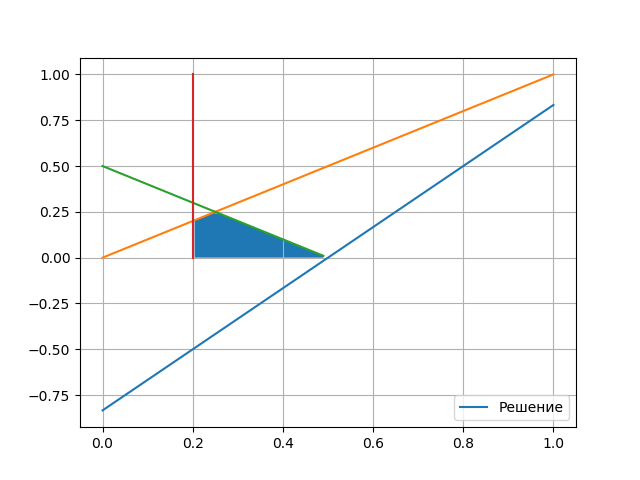

     fun: -0.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.5, 0. , 0.3])
  status: 0
 success: True
       x: array([0.5, 0. ])

In [120]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.5-x
f3 = 0.2

plt.grid()
plt.plot(x, 10*x/6-10/12)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[np.logical_and(f3<=x, x<=0.5)],
                         0,
                         np.min(np.array([x[np.logical_and(f3 <x, x<=0.5)],
                         (1/2-x)[np.logical_and(0.2<=x, x<=0.5)]]), axis=0));
plt.legend(['Решение'])
linprog([-1, -0.6], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.2])

#### бесконечное ножество решений

$\begin{cases}
-y-x \rightarrow min \\
y+x \leq 0.5 \\
y-x\leq 0 \\
x \geq 0.2
\end{cases}$

$\begin{cases}
-y - x \rightarrow min \\
y + x + x_1 = 0.5 \\
y - x + x_2 = 0 \\
x - x_3 = 0.2
\end{cases}$

<IPython.core.display.Javascript object>


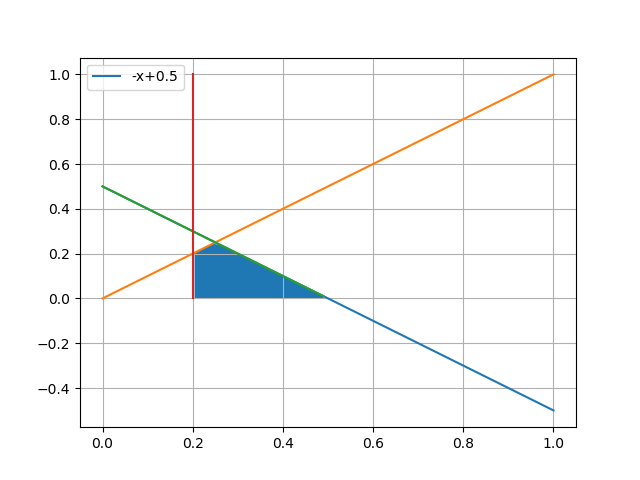

     fun: -0.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.  , 0.  , 0.05])
  status: 0
 success: True
       x: array([0.25, 0.25])

In [121]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.5-x
f3 = 0.2

plt.grid()
plt.plot(x, -x+0.5)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[np.logical_and(f3<x, x<0.5)],
                         0,
                         np.min(np.array([x[np.logical_and(f3 <x, x<0.5)],
                         (1/2-x)[np.logical_and(0.2<x, x<0.5)]]), axis=0));
plt.legend(['-x+0.5'])
linprog([-1, -1], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.2])

####  допустимая область пуста


$\begin{cases}
-y-x \rightarrow min \\
y+x \leq 0.5 \\
y-x\leq 0 \\
x \geq 0.51
\end{cases}$

$\begin{cases}
-y - x \rightarrow min \\
y + x + x_1 = 0.5 \\
y - x + x_2 = 0 \\
x - x_3 = 0.51
\end{cases}$

<IPython.core.display.Javascript object>


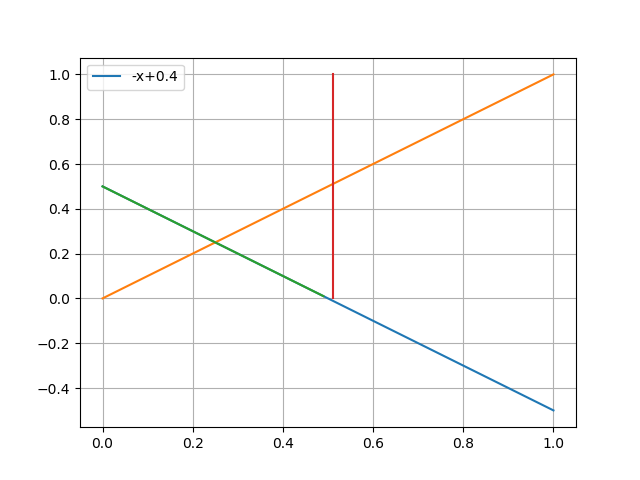

     fun: 0.010000000000000009
 message: 'Optimization failed. Unable to find a feasible starting point.'
     nit: 1
  status: 2
 success: False
       x: nan

In [122]:
fig = plt.figure()
x = np.linspace(0, 1, 50)

f1 = x
f2 = 0.5-x
f3 = 0.51

plt.grid()
plt.plot(x, -x+0.5)
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
plt.legend(['-x+0.4'])
linprog([-1, -1], [[-1, 1], [1, 1], [-1, 0]], [0, 0.5, -0.51])

#### функция не ограничена в заданной области

$\begin{cases}
-y-x \rightarrow min \\
y+x \leq 0.5 \\
y-0.2x\geq 0 \\
x \geq 0.2
\end{cases}$

$\begin{cases}
-y - x \rightarrow min \\
y + x + x_1 = 0.5 \\
y + 0.2x + x_2 = 0 \\
x - x_3 = 0.2
\end{cases}$

<IPython.core.display.Javascript object>


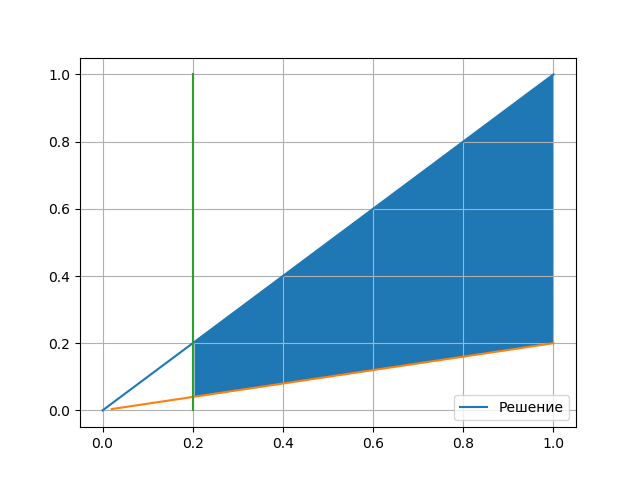

     fun: -1.25
 message: 'Optimization failed. The problem appears to be unbounded.'
     nit: 3
   slack: array([0.   , 0.   , 0.425])
  status: 3
 success: False
       x: array([0.625, 0.625])

In [123]:
fig = plt.figure()
x = np.linspace(0, 1, 50)
f = 0.1*x
f1 = x
f2 = 0.2*x
f3 = 0.2

plt.grid()
plt.plot(x, f1)
plt.plot(x[f2>0], f2[f2>0])
plt.plot([f3]*len(x), x)
fig.axes[0].fill_between(x[x>=f3],
                         f1[x>=f3],
                         f2[x>=f3]);
plt.legend(['Решение'])
linprog([-1, -1], [[-1, 1], [-0.2, 1], [-1, 0]], [0, 0.5, -0.2])